# Capstone Project 1:
## Home Loan Credibility Assessment

## 2. Data Understanding
### 2.1 Import Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

# pandas column display 
pd.set_option('display.max_columns', 122)

## Version 1.

In [2]:
X = pd.read_csv("./Data_Files/application_train.csv")

# Drop rows with null values. Missing value treatment.
X.dropna(inplace=True)

y = X['TARGET']

# Remove ID variables
X.drop(['SK_ID_CURR', 'TARGET'], axis=1, inplace=True)

# one-hot encoding of categorical variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(6021, 233) (2581, 233) (6021,) (2581,)


In [3]:
log_reg = LogisticRegression()

# Train on the training data
log_reg.fit(X_train, y_train)

result = log_reg.score(X_test, y_test)
print("Accuracy of LogisticRegression: %.3f%%" % (result*100))

Accuracy of LogisticRegression: 93.956%


In [4]:
y_pred = log_reg.predict(X_test)
len(y_pred)


2581


Confusion matrix: 
 [[2425    0]
 [ 156    0]]

Classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2425
           1       0.00      0.00      0.00       156

    accuracy                           0.94      2581
   macro avg       0.47      0.50      0.48      2581
weighted avg       0.88      0.94      0.91      2581



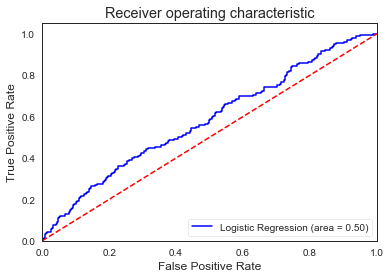

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred = log_reg.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))

print('\nClassification report: \n',classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, 'b', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [6]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train) 
result = rfc.score(X_test, y_test) 
print("Accuracy of RandomForestClassifier: %.3f%%" % (result*100))

Accuracy of RandomForestClassifier: 93.956%



Confusion matrix: 
 [[2425    0]
 [ 156    0]]

Classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2425
           1       0.00      0.00      0.00       156

    accuracy                           0.94      2581
   macro avg       0.47      0.50      0.48      2581
weighted avg       0.88      0.94      0.91      2581



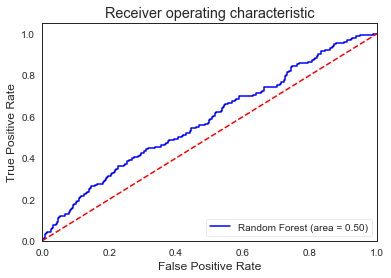

In [7]:
y_pred = log_reg.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))

print('\nClassification report: \n',classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, 'b', label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Version 2. 

In [14]:
X = pd.read_csv("./Data_Files/application_train.csv")
y = X['TARGET']

# Remove ID variables
X.drop(['SK_ID_CURR', 'TARGET'], axis=1, inplace=True)

# one-hot encoding of categorical variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(215257, 244) (92254, 244) (215257,) (92254,)


In [18]:
# Feature names
features = list(X_train.columns)

# Copy of the testing data
X_test = X_test

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'mean')

# Fit on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

print('Training data shape: ', train.shape, 'Testing data shape: ', test.shape)

Training data shape:  (215257, 244) Testing data shape:  (92254, 244)


In [19]:
log_reg = LogisticRegression()

# Train on the training data
log_reg.fit(X_train, y_train)

result = log_reg.score(X_test, y_test)
print("Accuracy of LogisticRegression: %.3f%%" % (result*100))

Accuracy of LogisticRegression: 91.963%



Confusion matrix: 
 [[84840     1]
 [ 7413     0]]

Classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



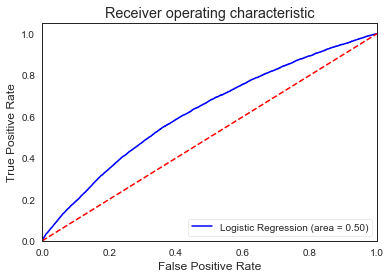

In [20]:
y_pred = log_reg.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))

print('\nClassification report: \n',classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, 'b', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [22]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train) 
result = rfc.score(X_test, y_test) 
print("Accuracy of RandomForestClassifier: %.3f%%" % (result*100))

Accuracy of RandomForestClassifier: 91.967%



Confusion matrix: 
 [[84840     1]
 [ 7413     0]]

Classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



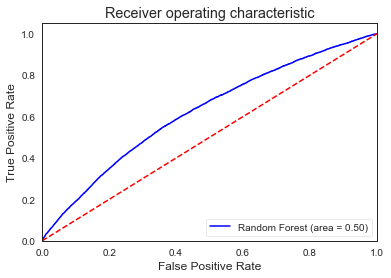

In [23]:
y_pred = log_reg.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))

print('\nClassification report: \n',classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, 'b', label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()